In [1]:

import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [4]:
data_dup = data.duplicated().any()

In [5]:
data_dup

np.True_

In [6]:
data = data.drop_duplicates()

In [7]:
data_dup = data.duplicated().any()

In [9]:
data_dup = data.duplicated().any()

In [10]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [11]:
cate_val

['sex',
 'chest pain type',
 'fasting blood sugar',
 'resting ecg',
 'exercise angina',
 'ST slope',
 'target']

In [12]:

cont_val

['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

In [13]:
cate_val

['sex',
 'chest pain type',
 'fasting blood sugar',
 'resting ecg',
 'exercise angina',
 'ST slope',
 'target']

In [17]:
data['chest pain type'].unique()

array([2, 3, 4, 1])

In [18]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [19]:
data.head()

,age,sex,resting bp s,cholesterol,max heart rate,oldpeak,target,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar_1,resting ecg_1,resting ecg_2,exercise angina_1,ST slope_1,ST slope_2,ST slope_3
0,40,1,140,289,172,0.0,0,True,False,False,False,False,False,False,True,False,False
1,49,0,160,180,156,1.0,1,False,True,False,False,False,False,False,False,True,False
2,37,1,130,283,98,0.0,0,True,False,False,False,True,False,False,True,False,False
3,48,0,138,214,108,1.5,1,False,False,True,False,False,False,True,False,True,False
4,54,1,150,195,122,0.0,0,False,True,False,False,False,False,False,True,False,False


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [22]:
data.head()

,age,sex,resting bp s,cholesterol,max heart rate,oldpeak,target,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar_1,resting ecg_1,resting ecg_2,exercise angina_1,ST slope_1,ST slope_2,ST slope_3
0,-1.433140,1,0.410909,0.825070,1.382928,-0.832432,0,True,False,False,False,False,False,False,True,False,False
1,-0.478484,0,1.491752,-0.171961,0.754157,0.105664,1,False,True,False,False,False,False,False,False,True,False
2,-1.751359,1,-0.129513,0.770188,-1.525138,-0.832432,0,True,False,False,False,True,False,False,True,False,False
3,-0.584556,0,0.302825,0.139040,-1.132156,0.574711,1,False,False,True,False,False,False,True,False,True,False
4,0.051881,1,0.951331,-0.034755,-0.581981,-0.832432,0,False,True,False,False,False,False,False,True,False,False


In [23]:
X = data.drop('target',axis=1)

In [24]:
y = data['target']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
y_test

670    0
30     1
378    1
536    1
809    0
      ..
212    1
747    1
585    1
880    0
452    1
Name: target, Length: 184, dtype: int64

In [28]:
data.head

<bound method NDFrame.head of            age  sex  resting bp s  cholesterol  max heart rate   oldpeak  \
0    -1.433140    1      0.410909     0.825070        1.382928 -0.832432   
1    -0.478484    0      1.491752    -0.171961        0.754157  0.105664   
2    -1.751359    1     -0.129513     0.770188       -1.525138 -0.832432   
3    -0.584556    0      0.302825     0.139040       -1.132156  0.574711   
4     0.051881    1      0.951331    -0.034755       -0.581981 -0.832432   
...        ...  ...           ...          ...             ...       ...   
1185 -0.902775    1     -1.210356     0.596393       -0.188999  0.293283   
1186  1.536902    1      0.627078    -0.053049        0.164684  2.357094   
1187  0.370100    1     -0.129513    -0.620168       -0.857069  0.293283   
1188  0.370100    0     -0.129513     0.340275        1.461525 -0.832432   
1189 -1.645286    1      0.302825    -0.217696        1.422226 -0.832432   

      target  chest pain type_2  chest pain type_3  chest

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred1 = log.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred1)

0.8532608695652174

In [39]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.875

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.8586956521739131

In [40]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [41]:
score

[0.8152173913043478,
 0.7608695652173914,
 0.8586956521739131,
 0.8260869565217391,
 0.8586956521739131,
 0.842391304347826,
 0.8586956521739131,
 0.8586956521739131,
 0.8641304347826086,
 0.8478260869565217,
 0.8641304347826086,
 0.8532608695652174,
 0.875,
 0.8695652173913043,
 0.8695652173913043,
 0.8641304347826086,
 0.875,
 0.875,
 0.875,
 0.8641304347826086,
 0.8858695652173914,
 0.875,
 0.8804347826086957,
 0.8695652173913043,
 0.8641304347826086,
 0.8695652173913043,
 0.8804347826086957,
 0.8641304347826086,
 0.8804347826086957,
 0.8804347826086957,
 0.8804347826086957,
 0.8804347826086957,
 0.8804347826086957,
 0.8695652173913043,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875]

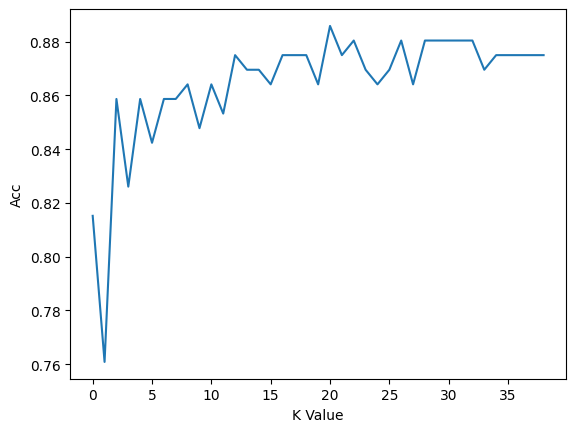

In [42]:
import matplotlib.pyplot as plt
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [43]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7608695652173914

In [44]:
data = pd.read_csv('heart.csv')
data = data.drop_duplicates()
X = data.drop('target',axis=1)
y=data['target']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred4= dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.8369565217391305

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred5= rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8858695652173914

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test,y_pred6)

0.8695652173913043

In [50]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [51]:
final_data

,Models,ACC
0,LR,85.326087
1,SVM,87.500000
2,KNN,85.869565
3,DT,83.695652
4,RF,88.586957
5,GB,86.956522


<Axes: xlabel='Models', ylabel='ACC'>

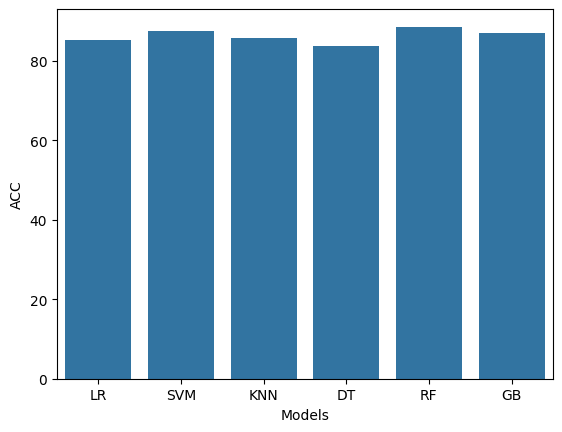

In [67]:
import seaborn as sns
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

In [68]:
X=data.drop('target',axis=1)
y=data['target']

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [104]:
import pandas as pd

In [105]:
new_data = data.iloc[0]


In [106]:
new_data

age                     40.0
sex                      1.0
chest pain type          2.0
resting bp s           140.0
cholesterol            289.0
fasting blood sugar      0.0
resting ecg              0.0
max heart rate         172.0
exercise angina          0.0
oldpeak                  0.0
ST slope                 1.0
target                   0.0
Name: 0, dtype: float64

In [ ]:
p = rf.predict(new_data)
for prediction in p:
    if prediction == 0:
        print("No Disease")
    else:
        print("Disease")

In [81]:
import joblib

In [82]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [108]:
model = joblib.load('model_joblib_heart')

In [ ]:
model.predict(new_data)

In [110]:
data.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [111]:
from tkinter import *
import joblib

In [ ]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()